In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
import os
import cv2
import numpy as np

def load_and_preprocess_images_cv(folder_path, target_size=(28, 28)):
    images = []
    for filename in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            try:
                # Read image in grayscale mode
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Warning: Unable to load {file_path}")
                    continue
                # Resize image
                img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
                # Normalize pixel values to [0,1]
                img_normalized = img_resized / 255.0
                # Expand dims to add channel dimension (28,28) -> (28,28,1)
                img_expanded = np.expand_dims(img_normalized, axis=-1)
                images.append(img_expanded)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
    return np.array(images)


In [16]:
folder= r'/content/drive/MyDrive/collected_images'
images_np = load_and_preprocess_images_cv(folder)
print(images_np.shape)

(310, 28, 28, 1)


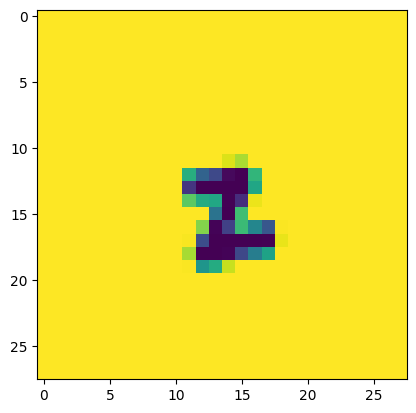

In [22]:
import matplotlib.pyplot as plt
# plot first few images
plt.imshow(images_np[307])

In [23]:
images_np[1].shape

(28, 28, 1)

In [24]:
import tensorflow as tf
hybrid_model = tf.keras.models.load_model(r'/content/new_hybrid_model.keras')

In [25]:
hybrid_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 18, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 18, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │        12,079 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 729,359 (2.78 MB)

 Trainable params: 243,119 (949.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 486,240 (1.85 MB)

In [29]:
pred = hybrid_model.predict(images_np)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step


In [32]:
print(pred[1])

[1.48766805e-04 2.45910865e-04 2.21302137e-02 5.00756723e-04
 4.14431619e-04 7.56861336e-05 4.01091995e-04 2.09779901e-05
 9.56637305e-05 3.20384512e-03 1.00084930e-03 5.05987089e-03
 4.41172142e-06 4.74103726e-04 2.30289406e-05 1.50932310e-05
 1.68422870e-02 1.97299873e-03 6.57149940e-05 1.68774015e-04
 2.72328089e-06 1.28903092e-04 1.80008786e-03 1.21393525e-04
 4.83081763e-04 1.99036580e-03 7.73824751e-01 5.68543473e-05
 8.05438438e-04 4.18371746e-05 9.39457153e-04 5.99366394e-05
 8.29662830e-02 3.89272918e-06 1.34525087e-03 6.27103844e-04
 3.27668712e-02 1.80379036e-04 7.62590556e-04 1.80377305e-04
 2.69279517e-05 2.79042199e-02 2.51290694e-05 7.30733300e-05
 1.99736860e-02 3.92810289e-05 5.71151668e-06]
